In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("train.tsv", delimiter = '\t', quoting = 3)

In [5]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
print(df['SentenceId'].unique())
print(df['PhraseId'].unique())
print(df['Sentiment'].unique())

[   1    2    3 ... 8542 8543 8544]
[     1      2      3 ... 156058 156059 156060]
[1 2 3 4 0]


In [7]:
df['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [8]:
df['Phrase'][1]

'A series of escapades demonstrating the adage that what is good for the goose'

In [9]:
dis = df.groupby(['Sentiment']).size()
print(dis.keys())
print(dis.values)

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Sentiment')
[ 7072 27273 79582 32927  9206]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize = (12,8))

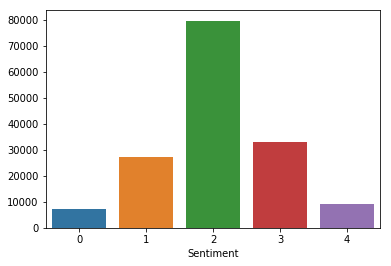

In [11]:
sns.barplot(dis.keys(),dis.values)

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
print(df['Phrase'][0])
nltk.download('stopwords')

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Majith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
corpus = []

c = df['SentenceId'].unique()
n = 0
for i in df['SentenceId'] : 
    if(i != n):
        n=i
        review = re.sub('[^a-zA-Z]',' ',df['Phrase'][0]) 
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
print(corpus)

['seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occasion amus none amount much stori', 'seri escapad demonstr adag good goos also good gander occa

In [14]:
print(c)
print(i)

[   1    2    3 ... 8542 8543 8544]
8544


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [16]:
import keras

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [21]:
y= df['Sentiment'].unique()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [8529, 5]